In [393]:
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import tushare as ts
import datetime
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA

In [394]:
ALL_DATA=ts.get_gdp_year()
YEAR_GDP_DATA=ALL_DATA.loc[::-1,['year','gdp']]
YEAR_GDP_DATA.head(10)

,year,gdp
65,1952,679.0
64,1953,824.0
63,1954,859.0
62,1955,910.0
61,1956,1028.0
60,1957,1068.0
59,1958,1307.0
58,1959,1439.0
57,1960,1457.0
56,1961,1220.0


In [439]:
GDP_DATA=YEAR_GDP_DATA.set_index('year')
GDP_DATA.head(10)
GDP_SERIES=GDP_DATA['gdp']
GDP_SERIES.head(10)

year
1952     679.0
1953     824.0
1954     859.0
1955     910.0
1956    1028.0
1957    1068.0
1958    1307.0
1959    1439.0
1960    1457.0
1961    1220.0
Name: gdp, dtype: float64

In [447]:
def test_stationarity(timeseries):
    
    #滑动均值和方差
    rolmean = timeseries.rolling(4).mean()
    rolstd = timeseries.rolling(4).std()

    #绘制滑动统计量
    plt.figure(figsize=(24, 8))   
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #adf检验
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

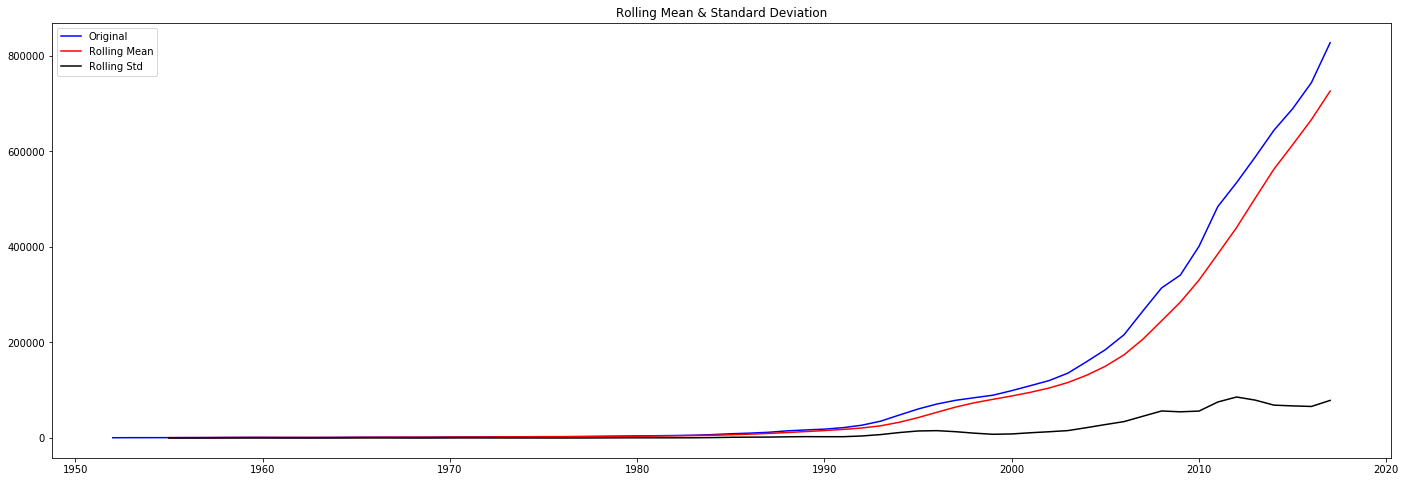

Results of Dickey-Fuller Test:
Test Statistic                  3.923665
p-value                         1.000000
#Lags Used                     11.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


In [448]:
test_stationarity(GDP_SERIES)

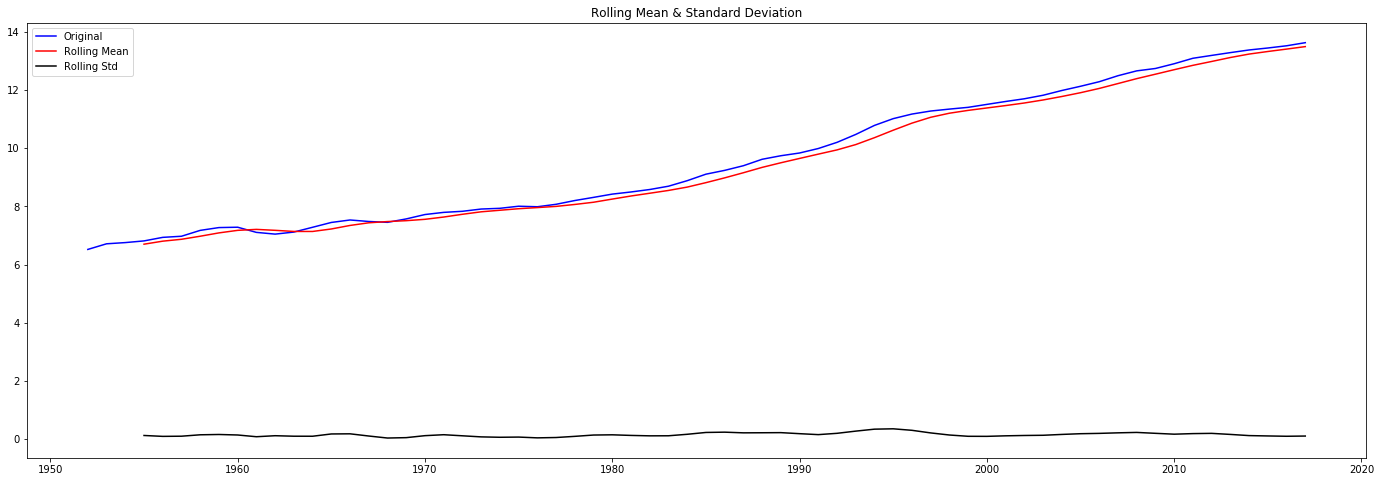

Results of Dickey-Fuller Test:
Test Statistic                  1.383948
p-value                         0.997040
#Lags Used                      2.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


In [449]:
GDP_LOG = np.log(GDP_SERIES)
test_stationarity(GDP_LOG)

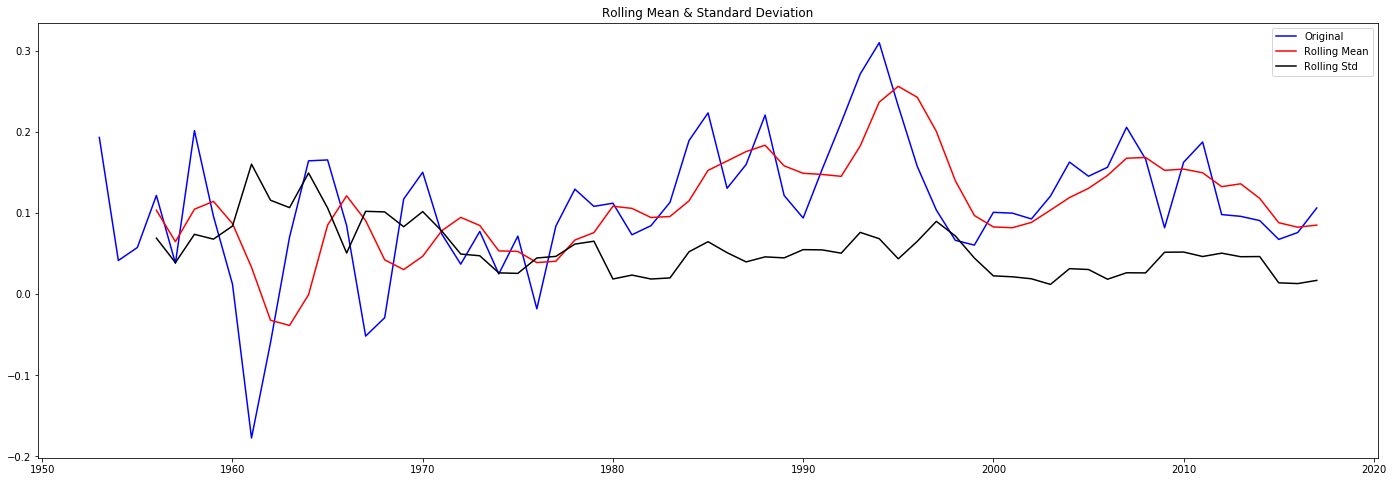

Results of Dickey-Fuller Test:
Test Statistic                 -3.768033
p-value                         0.003252
#Lags Used                      2.000000
Number of Observations Used    62.000000
Critical Value (1%)            -3.540523
Critical Value (5%)            -2.909427
Critical Value (10%)           -2.592314
dtype: float64


In [450]:
GDP_LOG_DIFF1=GDP_LOG.diff(1)
GDP_LOG_DIFF1.dropna(inplace=True)
test_stationarity(GDP_LOG_DIFF1)

In [403]:
GDP_LOG_DIFF1.index

Int64Index([1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
            1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
            1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
            1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
            1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64', name='year')

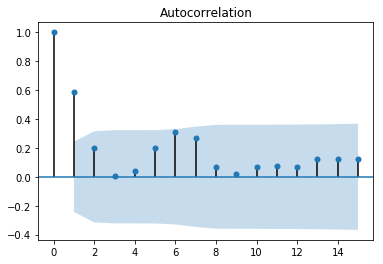

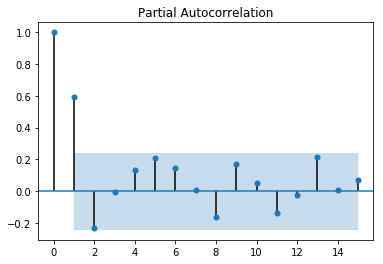

In [404]:
plot_acf(GDP_LOG_DIFF1,lags=15)
plot_pacf(GDP_LOG_DIFF1,lags=15)
plt.show()

In [423]:
import statsmodels.tsa.stattools as st
order = st.arma_order_select_ic(GDP_LOG_DIFF1,max_ar=3,max_ma=3,ic=['aic', 'bic', 'hqic'])
order.bic_min_order

D:\program\anaconda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\program\anaconda\envs\tensorflow\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
D:\program\anaconda\envs\tensorflow\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
D

(0, 2)

In [465]:
MODEL20=ARMA(GDP_LOG_DIFF1,(0,2)).fit()

D:\program\anaconda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


D:\program\anaconda\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


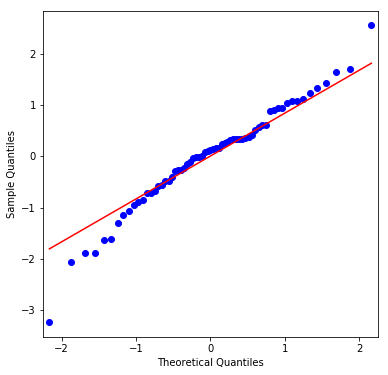

In [466]:
resid = MODEL20.resid
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)
plt.show()

In [467]:
import statsmodels.api as sm
print(sm.stats.durbin_watson(resid.values))

2.0426832145747067


In [459]:
PREDICT_ARMA = MODEL20.predict(start=0,end=70)
PREDICT_ARMA.index=PREDICT_ARMA.index+1953

D:\program\anaconda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [460]:
len(GDP_LOG_DIFF1)

65

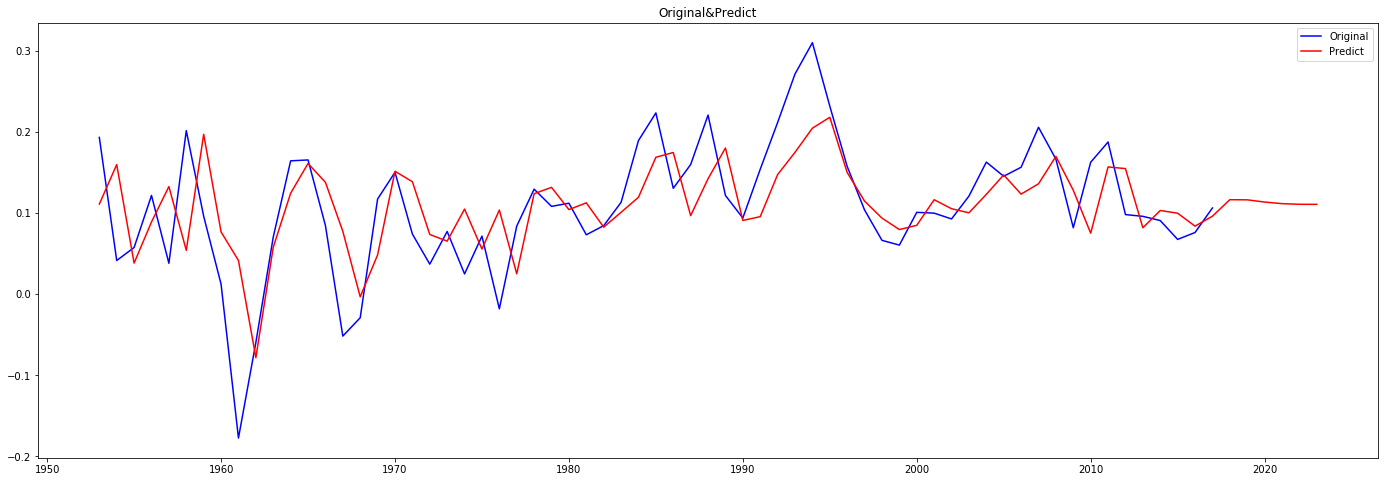

In [461]:
plt.figure(figsize=(24, 8))   
orig = plt.plot(GDP_LOG_DIFF1, color='blue',label='Original')
predict = plt.plot(PREDICT_ARMA, color='red',label='Predict')
plt.legend(loc='best')
plt.title('Original&Predict')
plt.show(block=False)

In [420]:
# 一阶差分还原
PREDICT_GDP_LOG = PREDICT_ARMA.add(GDP_LOG.shift(1))
PREDICT_GDP_LOG[2018]=PREDICT_ARMA[2018]+GDP_LOG[2017]
# 对数还原
PREDICT_GDP = np.exp(PREDICT_GDP_LOG)
PREDICT_GDP.dropna(inplace=True)

In [421]:
PREDICT_GDP[2018]

929785.5660631655

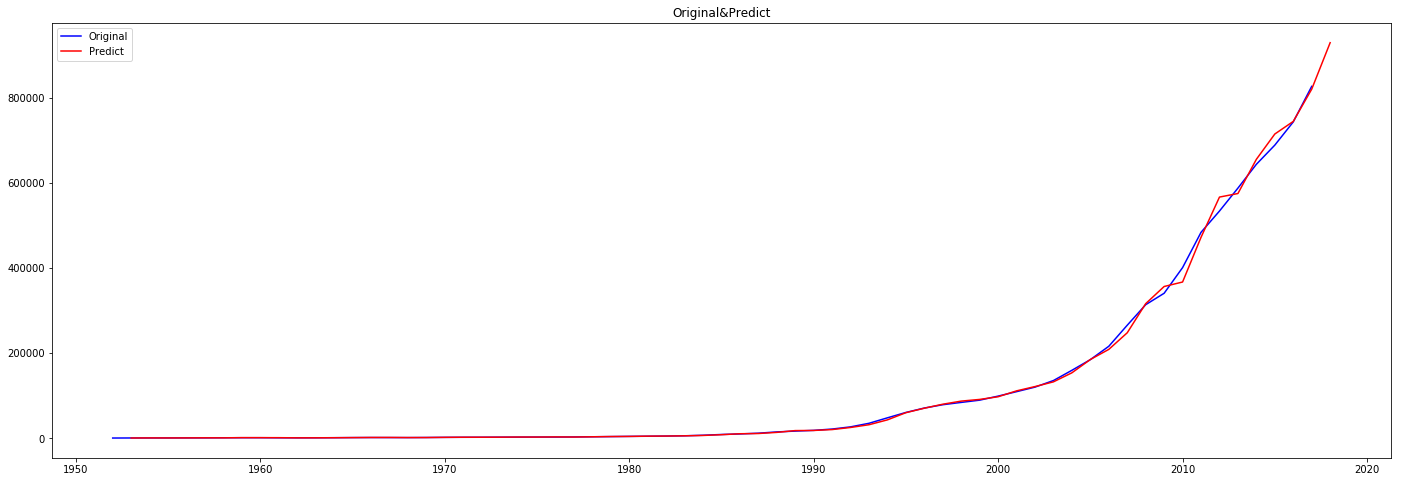

In [462]:
plt.figure(figsize=(24, 8))   
orig = plt.plot(GDP_SERIES, color='blue',label='Original')
predict = plt.plot(PREDICT_GDP, color='red',label='Predict')
plt.legend(loc='best')
plt.title('Original&Predict')
plt.show(block=False)

D:\program\anaconda\envs\tensorflow\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\program\anaconda\envs\tensorflow\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


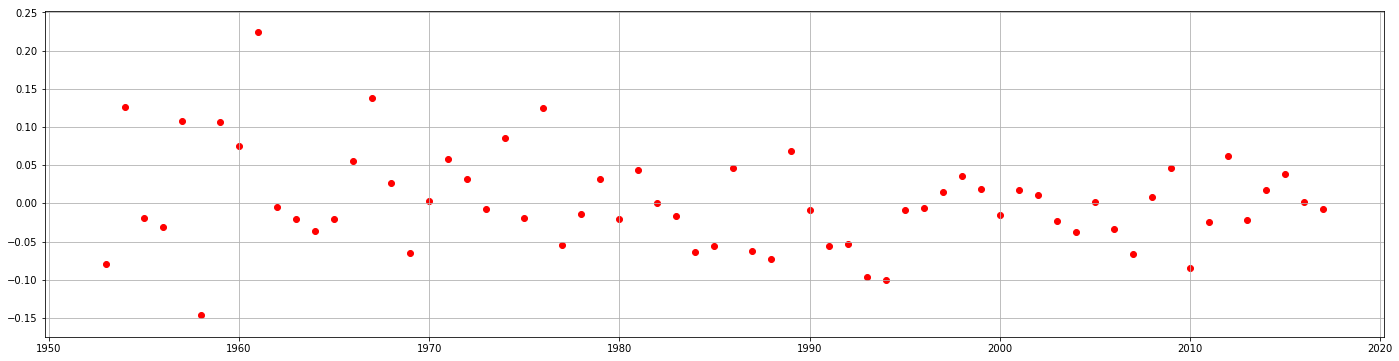

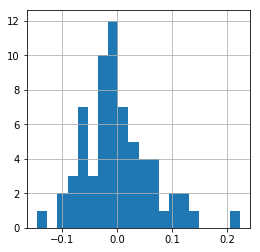

In [480]:
ERROR_RATE=(PREDICT_GDP-GDP_SERIES)/GDP_SERIES
plt.figure(figsize=(24, 6))   
plt.scatter(ERROR_RATE.index,ERROR_RATE,color='r')
plt.grid(True)
plt.figure(figsize=(4, 4))
plt.hist(ERROR_RATE, bins=20)
plt.grid(True)
plt.show()